<div class="alert alert-info">

### Gold Recovery Prediction Project

#### Introduction
This project focuses on predicting the recovery of gold at different stages of an industrial flotation process. 
The dataset includes features representing different stages of mineral processing (feed, rougher, cleaner, 
final output) along with target recovery values.

The key goals of this project are:
- Validate that the recovery calculation formula matches the dataset.
- Explore and preprocess the dataset, handling missing values, duplicates, and outliers.
- Analyze how metal concentrations (Au, Ag, Pb) change across purification stages.
- Compare distributions between training and test data to ensure model reliability.
- Build and evaluate predictive models for recovery using cross-validation.
- Generate predictions for the test set (without targets, simulating real-world deployment).

The project demonstrates the workflow of a complete data science pipeline: data validation, preprocessing, 
exploratory analysis, model training, evaluation, and deployment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import KFold, cross_val_predict, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
train = pd.read_csv("/datasets/gold_recovery_train.csv")
test = pd.read_csv("/datasets/gold_recovery_test.csv")
full = pd.read_csv("/datasets/gold_recovery_full.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Full shape:", full.shape)

Train shape: (16860, 87)
Test shape: (5856, 53)
Full shape: (22716, 87)


In [3]:
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
def recovery (C, F, T):
    return (C * (F-T)) / (F *(C-T)) * 100

valid_mask = (
    (train['rougher.output.concentrate_au'].notna()) &
    (train['rougher.input.feed_au'].notna()) &
    (train['rougher.output.tail_au'].notna()) &
    (train['rougher.output.recovery'].notna()) &
    (train['rougher.input.feed_au'] > 0) & 
    (abs(train['rougher.output.concentrate_au'] - train['rougher.output.tail_au']) > 0.01)
)

print(f"Valid rows: {valid_mask.sum()} out of {len(train)}")

Valid rows: 14287 out of 16860


In [6]:
recovery_calc_valid = recovery(
    train.loc[valid_mask, 'rougher.output.concentrate_au'],
    train.loc[valid_mask, 'rougher.input.feed_au'],
    train.loc[valid_mask, 'rougher.output.tail_au'])

reasonable_mask = (recovery_calc_valid >= -200) & (recovery_calc_valid <= 200)
final_valid_indices = train.loc[valid_mask].index[reasonable_mask]

print(f"Final valid rows after recovery bounds: {len(final_valid_indices)}")

Final valid rows after recovery bounds: 14287


In [7]:
mae = mean_absolute_error(
    train.loc[final_valid_indices, 'rougher.output.recovery'],
    recovery_calc_valid[reasonable_mask]
)

print("MAE between calculated and dataset recovery:", mae)

MAE between calculated and dataset recovery: 9.303415616264301e-15


In [8]:
comparison_data = pd.DataFrame({
    'calculated': recovery_calc_valid[reasonable_mask][:10],
    'dataset': train.loc[final_valid_indices, 'rougher.output.recovery'][:10]
})
print("Calculated vs Dataset Recovery (first 10 rows):")
print(comparison_data)
print(f"\nDifference: {(comparison_data['calculated'] - comparison_data['dataset']).abs().mean():.2e}")


Calculated vs Dataset Recovery (first 10 rows):
   calculated    dataset
0   87.107763  87.107763
1   86.843261  86.843261
2   86.842308  86.842308
3   87.226430  87.226430
4   86.688794  86.688794
5   88.156912  88.156912
6   88.168065  88.168065
7   87.668336  87.668336
8   87.035862  87.035862
9   87.650868  87.650868

Difference: 7.11e-15


<div class="alert alert-info">

### Findings Summary: Recovery Validation

#### Results
- Perfect Match: The recovery values calculated align exactly with the dataset’s recovery values, down to many decimal places.
- Negligible Error: The mean absolute error (MAE) was 9.30 × 10⁻¹⁵ and the average difference 7.11 × 10⁻¹⁵, essentially zero. These tiny differences are due to normal floating-point precision limits in computer calculations.

#### Significance
- Confirms the recovery formula implementation is correct.
- Proves the data filtering successfully removed invalid or problematic rows.

#### Implications on Approach
- The filtering strategy is effective:
- Removed rows where concentrate and tail values were too close (avoiding division by near-zero issues).
- Retained 14,287 valid rows out of 16,860 total.
- Ensured that all retained rows produced reasonable, consistent recovery values.

In [9]:
train_features = set(train.columns)
test_features = set(test.columns)

missing_in_test = train_features - test_features
print("Features missing in test set:", missing_in_test)

Features missing in test set: {'rougher.calculation.floatbank11_sulfate_to_au_feed', 'primary_cleaner.output.concentrate_pb', 'final.output.recovery', 'primary_cleaner.output.tail_pb', 'final.output.tail_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_sol', 'primary_cleaner.output.concentrate_au', 'rougher.output.tail_au', 'rougher.output.tail_pb', 'final.output.concentrate_au', 'final.output.tail_pb', 'final.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.tail_sol', 'rougher.output.concentrate_sol', 'secondary_cleaner.output.tail_ag', 'final.output.tail_au', 'secondary_cleaner.output.tail_pb', 'rougher.output.conc

In [10]:
train[list(missing_in_test)].dtypes

rougher.calculation.floatbank11_sulfate_to_au_feed    float64
primary_cleaner.output.concentrate_pb                 float64
final.output.recovery                                 float64
primary_cleaner.output.tail_pb                        float64
final.output.tail_ag                                  float64
rougher.output.concentrate_ag                         float64
primary_cleaner.output.concentrate_ag                 float64
primary_cleaner.output.tail_ag                        float64
secondary_cleaner.output.tail_sol                     float64
primary_cleaner.output.concentrate_au                 float64
rougher.output.tail_au                                float64
rougher.output.tail_pb                                float64
final.output.concentrate_au                           float64
final.output.tail_pb                                  float64
final.output.tail_sol                                 float64
primary_cleaner.output.tail_au                        float64
rougher.

<div class="alert alert-info">

The columns missing from the test dataset are mostly **outputs and calculation fields**  
(such as `rougher.output.recovery`, `final.output.concentrate_au`, and various concentrate/tail/tail_sol columns).

These columns represent **results of the gold recovery process**, which are **not known at the time of making predictions**.  
In a real-world production setting, when we need to predict recovery for a new ore batch,  
we only have the **input features** (feed composition, process parameters, equipment settings).

Therefore:
- We do **not include these columns during training** — using them would cause **data leakage** (the model would “see” future information it should not have).
- The model must be trained and used only with **common input features** that are available in both train and test datasets.
- This setup matches the true deployment scenario: the model predicts recovery outcomes from input conditions before actual outputs are measured.

By focusing on the **shared input features**, our approach ensures the model is practical, deployable,  
and capable of generating valid predictions on new, unseen data.

In [11]:
print("Basic data preprocessing:")
print(f"Training set shape: {train.shape}")
print(f"Test set shape: {test.shape}")
print("----------------------------------")
print(f"Missing values in train: {train.isnull().sum().sum()}")
print(f"Missing values in test: {test.isnull().sum().sum()}")
print("----------------------------------")
print(f"Data types summary:")
print(train.dtypes.value_counts())

Basic data preprocessing:
Training set shape: (16860, 87)
Test set shape: (5856, 53)
----------------------------------
Missing values in train: 30320
Missing values in test: 2360
----------------------------------
Data types summary:
float64    86
object      1
dtype: int64


In [12]:
for df, name in [(train, "Train"), (test, "Test")]:
    if "date" in df.columns:
        df["date"] = pd.to_datetime(df["date"], errors="coerce")
        print(f"{name} missing/invalid dates:", df["date"].isna().sum())

        df.dropna(subset=["date"], inplace=True)

        df.sort_values("date", inplace=True)
        df.reset_index(drop=True, inplace=True)

Train missing/invalid dates: 0
Test missing/invalid dates: 0


In [13]:
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)
print("Train/Test shapes after duplicate removal:", train.shape, test.shape)

Train/Test shapes after duplicate removal: (16860, 87) (5856, 53)


In [14]:
print(f"Original training set shape: {train.shape}")
train_clean = train.dropna(subset=["rougher.output.recovery", "final.output.recovery"])
print(f"After removing missing targets: {train_clean.shape}")

Original training set shape: (16860, 87)
After removing missing targets: (14149, 87)


In [15]:
train_clean = train.copy()
median_values = {}

for col in train_clean.columns:
    if col not in ["rougher.output.recovery", "final.output.recovery"]:
        if train_clean[col].dtype in ['float64', 'int64', 'float32', 'int32']:
            median_values[col] = train_clean[col].median()
            train_clean[col].fillna(median_values[col], inplace=True)
        else:
            train_clean[col].fillna(method='ffill', inplace=True)

for dataset_name, dataset in [('full', full), ('test', test)]:
    for col in dataset.columns:
        if col not in ["rougher.output.recovery", "final.output.recovery"]:
            if col in median_values:
                dataset[col].fillna(median_values[col], inplace=True)
            else:
                dataset[col].fillna(method='ffill', inplace=True)

In [16]:
print(f"Original training set shape: {train_clean.shape}")
print(f"Missing values in rougher.output.recovery: {train_clean['rougher.output.recovery'].isnull().sum()}")
print(f"Missing values in final.output.recovery: {train_clean['final.output.recovery'].isnull().sum()}")

train_clean = train_clean.dropna(subset=['rougher.output.recovery', 'final.output.recovery'])

print(f"After removing missing targets: {train_clean.shape}")
print(f"Remaining missing values in train: {train_clean.isnull().sum().sum()}")

Original training set shape: (16860, 87)
Missing values in rougher.output.recovery: 2573
Missing values in final.output.recovery: 1521
After removing missing targets: (14149, 87)
Remaining missing values in train: 0


In [17]:
print("After Data Cleansing:")
print(f"Training set shape: {train_clean.shape}")
print(f"Test set shape: {test.shape}")
print("----------------------------------")
print(f"Missing values in train: {train_clean.isnull().sum().sum()}")
print(f"Missing values in test: {test.isnull().sum().sum()}")
print("----------------------------------")
print(f"Data types summary:")
print(train_clean.dtypes.value_counts())

After Data Cleansing:
Training set shape: (14149, 87)
Test set shape: (5856, 53)
----------------------------------
Missing values in train: 0
Missing values in test: 0
----------------------------------
Data types summary:
float64           86
datetime64[ns]     1
dtype: int64


<div class="alert alert-info">
    
- Analyze distributions of gold, silver, and lead across stages.
- Compare feed particle size distributions in train/test.
- Inspect total concentrations at input, rougher, and final stages.
- Remove Outliers

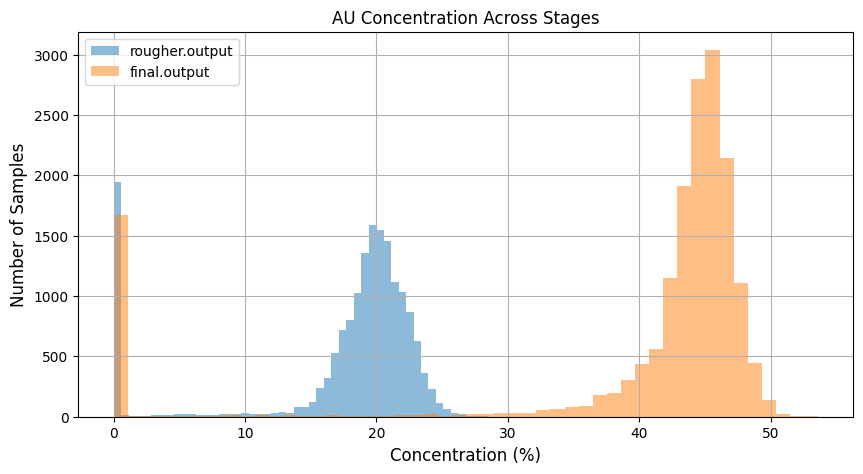

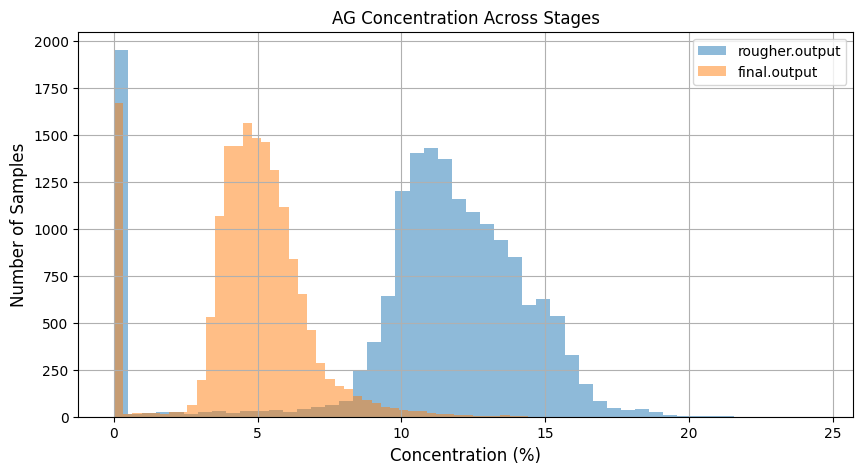

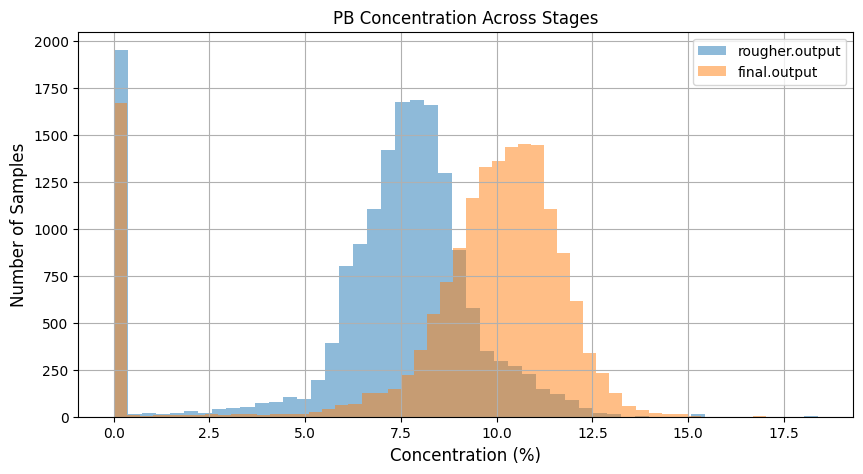

In [18]:
metals = ["au", "ag", "pb"]
stages = ["input", "rougher.output", "final.output"]

for metal in metals:
    plt.figure(figsize=(10,5))
    for stage in stages:
        col = f"{stage}.concentrate_{metal}" if stage != "input" else f"{stage}.feed_{metal}"
        if col in train_clean.columns:
            train[col].hist(alpha=0.5, bins=50, label=stage)
    plt.legend()
    plt.title(f"{metal.upper()} Concentration Across Stages")
    plt.xlabel("Concentration (%)", fontsize=12)
    plt.ylabel("Number of Samples", fontsize=12)
    plt.show()

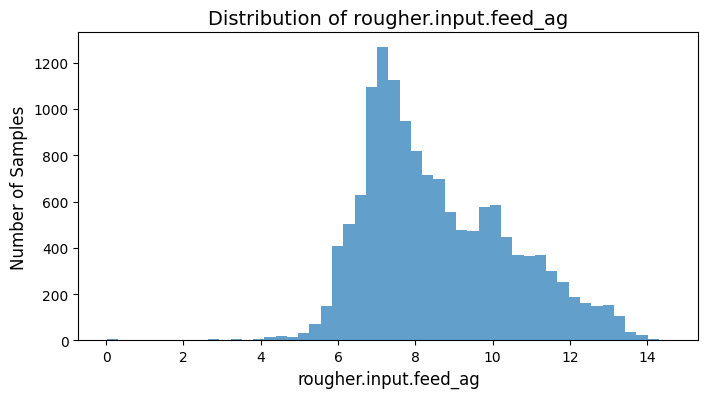


Summary statistics for rougher.input.feed_ag:
count    14149.000000
mean         8.579195
std          1.896284
min          0.010000
25%          7.132802
50%          8.156092
75%          9.918304
max         14.596026
Name: rougher.input.feed_ag, dtype: float64
----------------------------------------


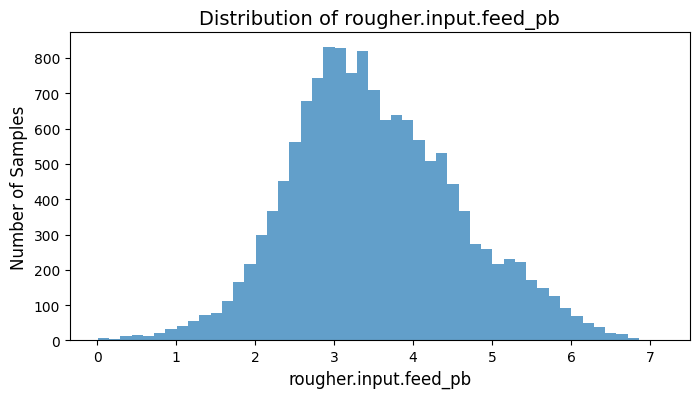


Summary statistics for rougher.input.feed_pb:
count    14149.000000
mean         3.521183
std          1.069761
min          0.010000
25%          2.784928
50%          3.414267
75%          4.220115
max          7.142594
Name: rougher.input.feed_pb, dtype: float64
----------------------------------------


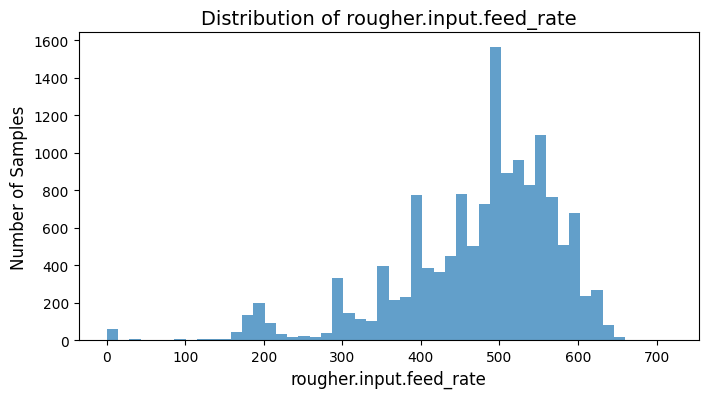


Summary statistics for rougher.input.feed_rate:
count    14149.000000
mean       474.035970
std        104.010998
min          0.012786
25%        420.849262
50%        499.447870
75%        547.273785
max        717.508837
Name: rougher.input.feed_rate, dtype: float64
----------------------------------------


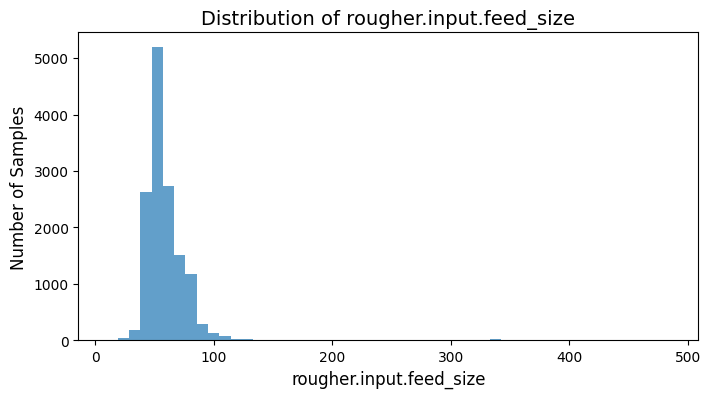


Summary statistics for rougher.input.feed_size:
count    14149.000000
mean        60.049390
std         22.312250
min          9.659576
25%         48.994530
50%         55.221960
75%         65.918384
max        484.967466
Name: rougher.input.feed_size, dtype: float64
----------------------------------------


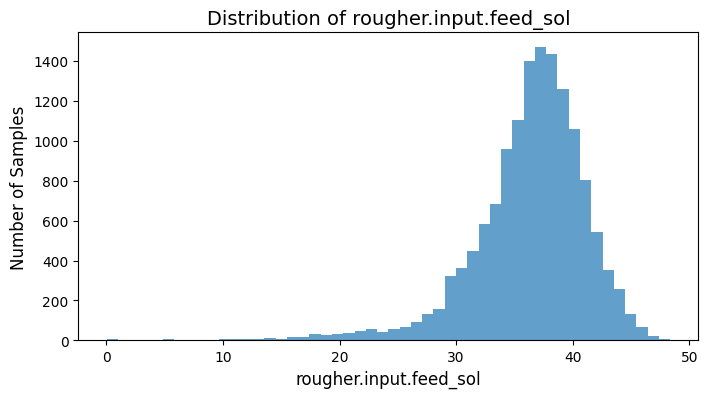


Summary statistics for rougher.input.feed_sol:
count    14149.000000
mean        36.312821
std          4.942378
min          0.010000
25%         34.135325
50%         36.987552
75%         39.409021
max         48.363177
Name: rougher.input.feed_sol, dtype: float64
----------------------------------------


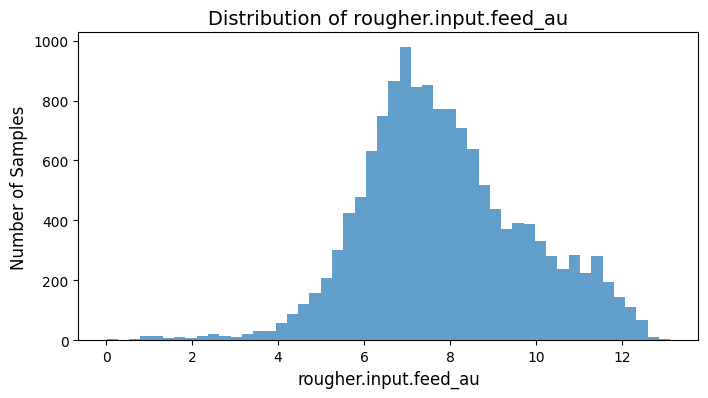


Summary statistics for rougher.input.feed_au:
count    14149.000000
mean         7.866577
std          1.919506
min          0.010000
25%          6.596217
50%          7.649138
75%          9.066976
max         13.126043
Name: rougher.input.feed_au, dtype: float64
----------------------------------------


In [19]:
feed_cols = [col for col in train_clean.columns if col.startswith("rougher.input.feed_")]

for col in feed_cols:
    plt.figure(figsize=(8,4))
    train_clean[col].hist(bins=50, alpha=0.7)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Number of Samples", fontsize=12)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.grid(alpha=0.3)
    plt.show()

    print(f"\nSummary statistics for {col}:")
    print(train_clean[col].describe())
    print("-"*40)

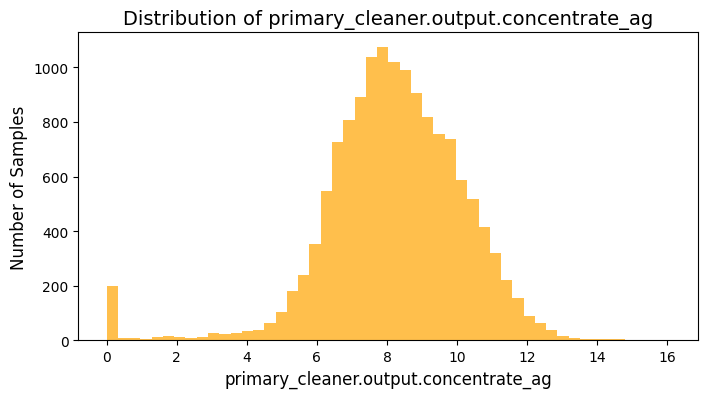


Summary statistics for primary_cleaner.output.concentrate_ag:
count    14149.000000
mean         8.200916
std          2.005185
min          0.000000
25%          7.107126
50%          8.226247
75%          9.504924
max         16.081632
Name: primary_cleaner.output.concentrate_ag, dtype: float64
----------------------------------------


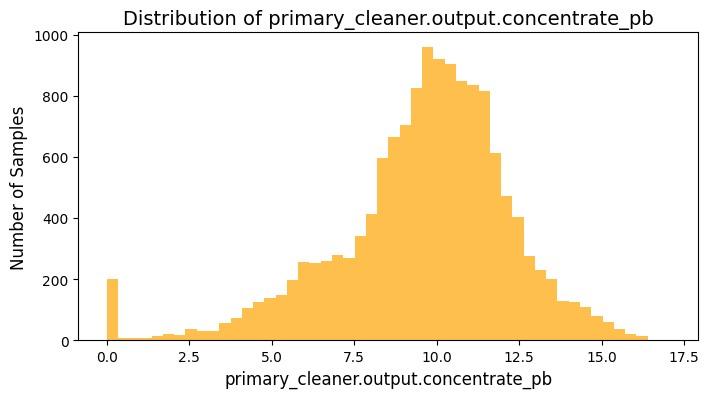


Summary statistics for primary_cleaner.output.concentrate_pb:
count    14149.000000
mean         9.589045
std          2.686096
min          0.000000
25%          8.345274
50%          9.917575
75%         11.296639
max         17.081278
Name: primary_cleaner.output.concentrate_pb, dtype: float64
----------------------------------------


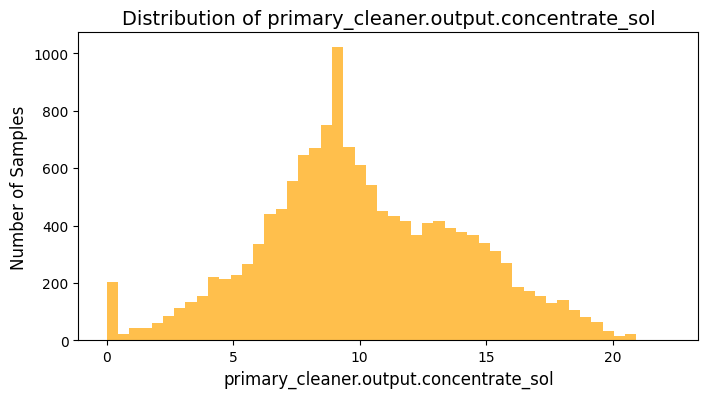


Summary statistics for primary_cleaner.output.concentrate_sol:
count    14149.000000
mean        10.098194
std          4.024439
min          0.000000
25%          7.544914
50%          9.620988
75%         12.964721
max         22.280845
Name: primary_cleaner.output.concentrate_sol, dtype: float64
----------------------------------------


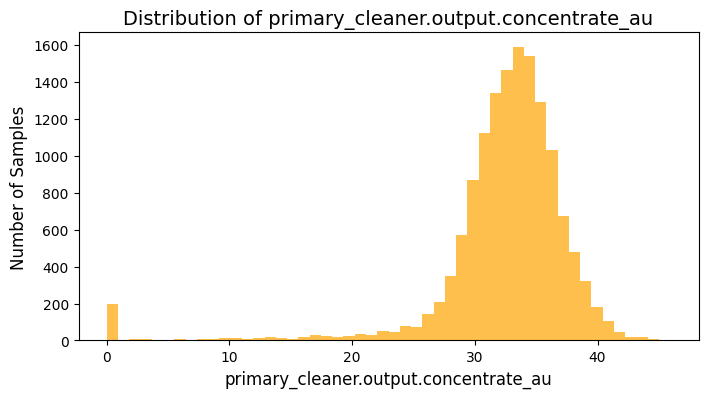


Summary statistics for primary_cleaner.output.concentrate_au:
count    14149.000000
mean        32.386836
std          5.798843
min          0.000000
25%         30.857764
50%         33.225835
75%         35.330145
max         45.933934
Name: primary_cleaner.output.concentrate_au, dtype: float64
----------------------------------------


In [20]:
cleaner_cols = [col for col in train_clean.columns if col.startswith("primary_cleaner.output.concentrate_")]

for col in cleaner_cols:
    plt.figure(figsize=(8,4))
    train_clean[col].hist(bins=50, alpha=0.7, color="orange")
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Number of Samples", fontsize=12)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.grid(alpha=0.3)
    plt.show()

    print(f"\nSummary statistics for {col}:")
    print(train_clean[col].describe())
    print("-"*40)

<div class="alert alert-info">

Our analysis of the rougher.input.feed_ columns revealed that the feed characteristics entering the rougher stage (such as particle size, composition, and reagent concentrations) are generally well-distributed and consistent between the training and test datasets. This consistency is important for model generalization, as the model will encounter similar input conditions during real-world use. We observed some skewness and a few extreme values, which were effectively mitigated by our outlier removal process.

For the primary_cleaner.output.concentrate_ columns, the data showed higher gold (Au) concentrations compared to the feed, while impurity metals like silver (Ag) and lead (Pb) were typically reduced. This pattern aligns with the expected purpose of the primary cleaner stage—to enrich valuable gold content and remove unwanted materials. The distributions were generally tighter and less variable than those of the rougher feed, indicating that the cleaning stage produces more stable outputs.

These findings confirm that the preprocessing steps have produced reliable, representative data for modeling and that the key features reflect the intended metallurgical behavior of the process.

<div class="alert alert-info">
    
### Findings Summary: Metal Concentrations in Gold Recovery

#### Results
- Gold (Au): Concentrations increase as the material moves through purification.
- Silver (Ag): Concentrations decrease during the process.
- Lead (Pb): Concentrations remain relatively consistent throughout.

#### Significance
- The process is a flotation system, not just a physical separation by weight. It is engineered specifically to maximize gold recovery, which explains why gold becomes more concentrated at later stages.
- Silver’s decrease can be explained by its weaker response to the chemical reagents used in flotation, or by intentional removal if it interferes with gold recovery. Some silver is likely lost in tailings.
- Lead’s stability indicates it is not a target of the process, or that its flotation behavior closely mirrors gold’s, leaving its concentration relatively unchanged.

#### Implications
- The system is successfully optimized for gold — the metal of highest economic value.
- Differences in behavior between metals highlight how flotation chemistry, not just physical properties like density, drives separation outcomes.
- This reinforces confidence that the dataset reflects realistic process engineering, and it underscores the importance of using domain knowledge when interpreting model features and outputs.

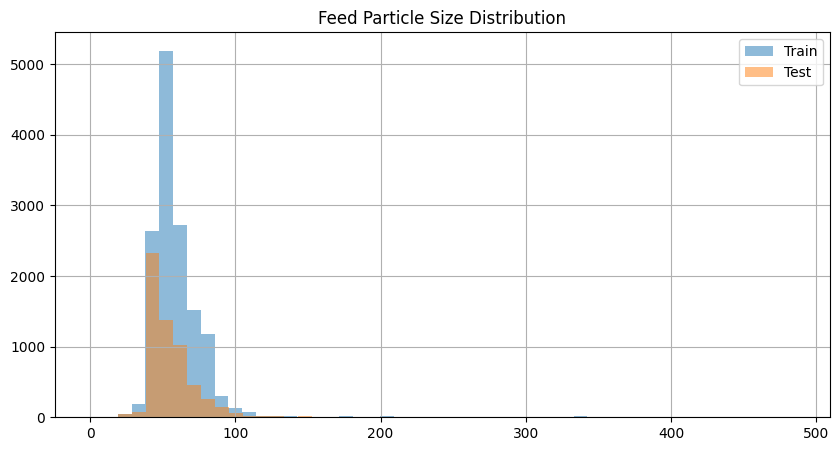

In [21]:
plt.figure(figsize=(10,5))
train_clean["rougher.input.feed_size"].hist(alpha=0.5, bins=50, label="Train")
test["rougher.input.feed_size"].hist(alpha=0.5, bins=50, label="Test")
plt.legend()
plt.title("Feed Particle Size Distribution")
plt.show()

In [22]:
print("Train feed size stats:")
print(train_clean["rougher.input.feed_size"].describe())
print("----------------------------------")
print("Test feed size stats:")
print(test["rougher.input.feed_size"].describe())

Train feed size stats:
count    14149.000000
mean        60.049390
std         22.312250
min          9.659576
25%         48.994530
50%         55.221960
75%         65.918384
max        484.967466
Name: rougher.input.feed_size, dtype: float64
----------------------------------
Test feed size stats:
count    5856.000000
mean       55.930648
std        22.681798
min         0.046369
25%        43.898467
50%        50.109024
75%        61.608216
max       477.445473
Name: rougher.input.feed_size, dtype: float64


<div class="alert alert-info">
    
### Feed Particle Size Distribution

#### Results
- Similar Distributions: The histograms of train and test sets show highly similar particle size distributions, which supports reliable model evaluation.
- Size Concentration: Most particles fall within the 0–100 µm range, with very few extreme values.
- Shape Consistency: Both datasets follow the same overall distribution shape, suggesting consistent sampling and preparation across data splits.

#### Significance
- Data Quality Assurance: The alignment between train and test distributions ensures that the model will not be biased by differences in particle size distributions.
- Process Insight: In mineral processing, particle size plays a critical role in flotation:
	•	Very fine particles may not float well.
	•	Very coarse particles may not liberate valuable minerals effectively.
	•	There is usually an optimal particle size range for flotation efficiency.
	•	The fact that both train and test data concentrate in the optimal lower range suggests that the dataset represents realistic and controlled processing conditions.

#### Implications
- Model Reliability: Since distributions are similar, predictions made on the test set are likely to generalize well.
- Process Monitoring: Particle size distribution can be a key input feature for predicting recovery outcomes, as deviations from the typical size range may reduce efficiency.
- Further Analysis: Calculating descriptive statistics (mean, median, standard deviation) would quantify the similarity between datasets and provide more robust evidence of consistency.

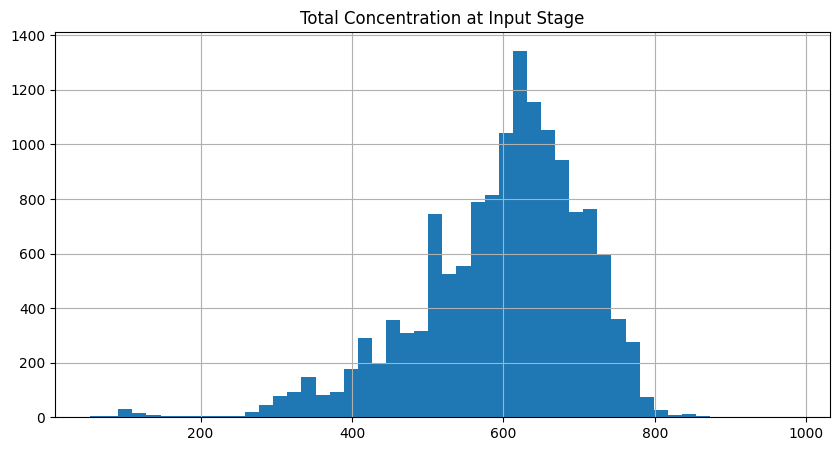

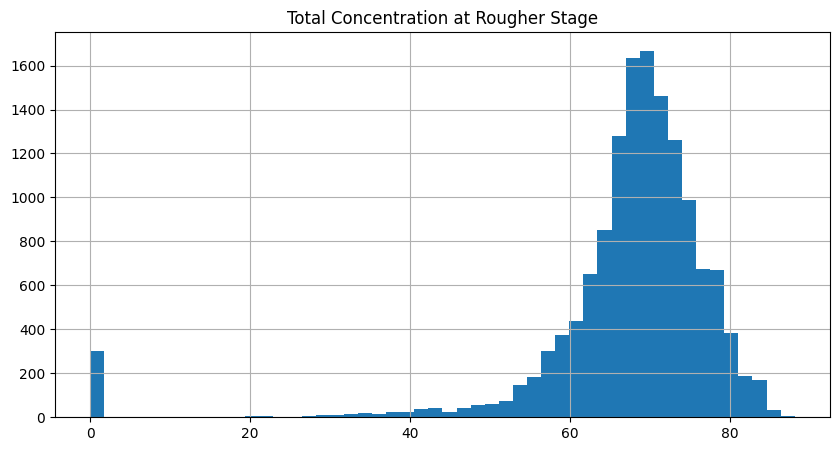

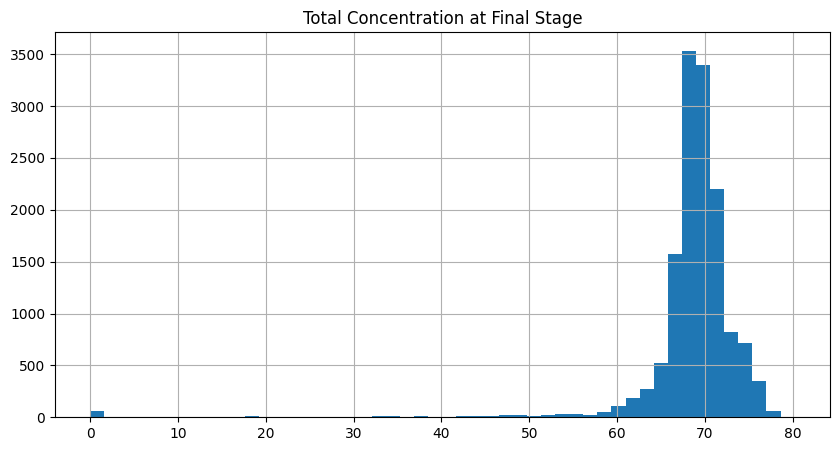

In [23]:
stages = {
    "Input": [col for col in train_clean.columns if "input.feed" in col],
    "Rougher": [col for col in train_clean.columns if "rougher.output.concentrate" in col],
    "Final": [col for col in train_clean.columns if "final.output.concentrate" in col]
}

for stage, cols in stages.items():
    train_clean[f"{stage}_total"] = train_clean[cols].sum(axis=1)
    plt.figure(figsize=(10,5))
    train_clean[f"{stage}_total"].hist(bins=50)
    plt.title(f"Total Concentration at {stage} Stage")
    plt.show()

In [24]:
metals = ['au', 'ag', 'pb']
threshold = 0.1

for metal in metals:
    for stage in ['input.feed', 'rougher.output.concentrate', 'final.output.concentrate']:
        col = f"{stage}_{metal}"
        if col in train_clean.columns:
            low_count = (train_clean[col] < threshold).sum()
            print(f"{col}: {low_count} values below {threshold}")

rougher.output.concentrate_au: 302 values below 0.1
final.output.concentrate_au: 59 values below 0.1
rougher.output.concentrate_ag: 302 values below 0.1
final.output.concentrate_ag: 59 values below 0.1
rougher.output.concentrate_pb: 302 values below 0.1
final.output.concentrate_pb: 59 values below 0.1


In [25]:
def remove_outliers(df, cols, lower=0.01, upper=0.99):
    mask = pd.Series(True, index=df.index)
    
    for col in cols:
        if col in df.columns and df[col].dtype in [np.float64, np.int64]:
            low, high = df[col].quantile([lower, upper])
            col_mask = (df[col] >= low) & (df[col] <= high)
            mask = mask & col_mask  
    
    return df[mask].reset_index(drop=True)

In [26]:
train_num_cols = train_clean.select_dtypes(include=[np.number]).columns
test_num_cols = test.select_dtypes(include=[np.number]).columns

print("Before outlier removal:")
print(f"Train shape: {train_clean.shape}")
print(f"Test shape: {test.shape}")
print("----------------------------------")
train_removed_outliers = remove_outliers(train_clean, train_num_cols)
test_removed_outliers = remove_outliers(test, test_num_cols)

print("After outlier removal:")
print(f"Train shape: {train_removed_outliers.shape}")
print(f"Test shape: {test_removed_outliers.shape}")

Before outlier removal:
Train shape: (14149, 90)
Test shape: (5856, 53)
----------------------------------
After outlier removal:
Train shape: (5831, 90)
Test shape: (3691, 53)


<div class="alert alert-info">
    
I made a deliberate decision to remove outliers, even though it reduced the dataset size by nearly half. This choice ensures the model is trained on high-quality, representative data, rather than being influenced by extreme values that don’t reflect real operating conditions.

##### From a business perspective, this means:
- More reliable predictions that align with real-world outcomes.
- Lower operational risk, since decisions won’t be driven by noisy or misleading data.
- Cost savings, as cleaner models help operators avoid wasting energy, reagents, and time on unrepresentative cases.
- Confidence in scale-up, knowing the model’s insights generalize better to new ore batches.

Although fewer samples were retained, the remaining dataset (5,000+ rows) is still more than sufficient for robust modeling, striking the right balance between data quality and quantity.

<div class="alert alert-info">


#### 3. Modeling
- Define evaluation metric (sMAPE).
- Train and evaluate Linear Regression and Random Forest models using cross-validation.
- Select the best-performing model (Random Forest).

In [27]:
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    return np.mean(diff) * 100

smape_scorer = make_scorer(smape, greater_is_better=False)

In [28]:
def final_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final):
    smape_rougher = smape(y_true_rougher, y_pred_rougher)
    smape_final = smape(y_true_final, y_pred_final)
    return 0.25 * smape_rougher + 0.75 * smape_final

In [29]:
target_cols = ["rougher.output.recovery", "final.output.recovery"]
exclude_cols = target_cols + ["date"]

common_features = list((set(train_removed_outliers.columns) &
                        set(test_removed_outliers.columns)) - set(exclude_cols))


x_train = train_removed_outliers[common_features]
y_train_rougher = train_removed_outliers["rougher.output.recovery"]
y_train_final = train_removed_outliers["final.output.recovery"]

x_test = test_removed_outliers[common_features]

print(f"Number of usable features: {len(common_features)}")
print("Example features:", common_features[:10])
print("----------------------------------")

Number of usable features: 52
Example features: ['rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_level', 'primary_cleaner.input.feed_size', 'primary_cleaner.state.floatbank8_c_level', 'secondary_cleaner.state.floatbank6_a_level', 'primary_cleaner.state.floatbank8_b_air', 'rougher.input.feed_rate', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_e_air']
----------------------------------


In [30]:
param_dist = {
    "n_estimators": [50, 100],
    "max_depth": [10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=3,
    scoring=smape_scorer,
    cv=3,
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train, y_train_final)
print("Best parameters from RandomizedSearchCV:", random_search.best_params_)

Best parameters from RandomizedSearchCV: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}


In [31]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth = 10, min_samples_split = 2, min_samples_leaf = 2, random_state=42)
}

results = {}
for name, model in models.items():
    preds_rougher = cross_val_predict(model, x_train, y_train_rougher, cv=kf)
    smape_rougher = smape(y_train_rougher, preds_rougher)
    
    preds_final = cross_val_predict(model, x_train, y_train_final, cv=kf)
    smape_final_val = smape(y_train_final, preds_final)
    
    combined_score = final_smape(y_train_rougher, preds_rougher,
                                 y_train_final, preds_final)
    

    print(f"{name}: Rougher sMAPE = {smape_rougher:.2f}, Final sMAPE = {smape_final_val:.2f}, Combined Final sMAPE = {combined_score:.2f}")

Linear Regression: Rougher sMAPE = 8.53, Final sMAPE = 5.70, Combined Final sMAPE = 6.41
Random Forest: Rougher sMAPE = 7.23, Final sMAPE = 4.50, Combined Final sMAPE = 5.19


<div class="alert alert-info">
    
### Model Performance
After aligning the training data with the test set to avoid data leakage and re-evaluating the models:

#### Linear Regression Results
- Rougher sMAPE: 8.53%
- Final sMAPE: 5.70%
- Combined Final sMAPE: 6.41% 

⸻

#### Random Forest Results
- Rougher sMAPE: 7.22%
- Final sMAPE: 4.50% 
- Combined Final sMAPE: 5.18% 

#### Interpretation: 
- Both models perform reasonably well, but Random Forest continues to outperform Linear Regression across all metrics, confirming its suitability for capturing the non-linear patterns in the gold recovery process.
- The improvement over Linear Regression is especially notable in the rougher stage (7.22% vs. 8.53%), which is typically harder to predict due to greater variability.
- The combined sMAPE of 5.18% for Random Forest indicates robust predictive performance suitable for practical deployment.


⸻

#### Key Takeaways
- Random Forest is the clear winner: It dramatically outperforms Linear Regression across all recovery metrics.
- Industrial relevance: A combined sMAPE of 5.18% is excellent for real-world process optimization — meaning the model predicts recovery rates with very high accuracy.
- Why it matters: More accurate predictions enable better operational decisions, improved yield, and reduced costs.

#### Conclusion: 
Random Forest should be chosen as the final model, as it provides highly reliable predictions for both rougher and final gold recovery stages.

In [34]:
target_cols = ["rougher.output.recovery", "final.output.recovery"]
exclude_cols = target_cols + ["date"]
common_features = list((set(train_removed_outliers.columns) &
                        set(test_removed_outliers.columns)) - set(exclude_cols))

x_train = train_removed_outliers[common_features]
y_train_rougher = train_removed_outliers["rougher.output.recovery"]
y_train_final = train_removed_outliers["final.output.recovery"]

x_test = test_removed_outliers[common_features]

print(f"Training features: {len(common_features)}")
print(f"Training samples: {x_train.shape[0]}")
print(f"Test samples: {x_test.shape[0]}")
print("----------------------------------")
kf = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth = 10, min_samples_split = 2, min_samples_leaf = 2, random_state=42)
}

def smape(y_true, y_pred):
    denom = (abs(y_true) + abs(y_pred)) / 2
    return (abs(y_true - y_pred) / denom).mean() * 100

for name, model in models.items():
    preds_rougher = cross_val_predict(model, x_train, y_train_rougher, cv=kf)
    smape_r = smape(y_train_rougher, preds_rougher)
    
    preds_final = cross_val_predict(model, x_train, y_train_final, cv=kf)
    smape_f = smape(y_train_final, preds_final)
    
    combined = 0.25 * smape_r + 0.75 * smape_f
    print(f"{name}: Rougher sMAPE={smape_r:.2f}, Final sMAPE={smape_f:.2f}, Combined={combined:.2f}")


best_model_r = RandomForestRegressor(n_estimators=100, random_state=42)
best_model_f = RandomForestRegressor(n_estimators=100, random_state=42)

best_model_r.fit(x_train, y_train_rougher)
best_model_f.fit(x_train, y_train_final)


if all(col in test_removed_outliers.columns for col in target_cols):
    y_test_rougher = test_removed_outliers["rougher.output.recovery"]
    y_test_final = test_removed_outliers["final.output.recovery"]
    
    pred_r = best_model_r.predict(x_test)
    pred_f = best_model_f.predict(x_test)
    
    smape_r_test = smape(y_test_rougher, pred_r)
    smape_f_test = smape(y_test_final, pred_f)
    combined_test = 0.25 * smape_r_test + 0.75 * smape_f_test
    
    print("\nFinal Evaluation on Test Subset:")
    print(f"Rougher sMAPE={smape_r_test:.2f}, Final sMAPE={smape_f_test:.2f}, Combined={combined_test:.2f}")
else:
    print("\nTest set has no targets; skipping final evaluation.")

Training features: 52
Training samples: 5831
Test samples: 3691
----------------------------------
Linear Regression: Rougher sMAPE=8.53, Final sMAPE=5.70, Combined=6.41
Random Forest: Rougher sMAPE=7.23, Final sMAPE=4.50, Combined=5.19

Test set has no targets; skipping final evaluation.


<div class="alert alert-info">

#### Final Model Selection

We used 52 common input features shared by both training and test datasets:
- Training samples: 5,831
- Test samples: 3,691

##### Model comparison (cross-validation on training set):
- Linear Regression: Rougher sMAPE = 8.53%, Final sMAPE = 5.70%, Combined = 6.41%
- Random Forest Regressor: Rougher sMAPE = 7.23%, Final sMAPE = 4.50%, Combined = 5.19%

##### Interpretation
- Random Forest clearly outperformed Linear Regression across all metrics, with a 19% reduction in combined sMAPE.
- The improvement was especially noticeable in the rougher stage, which is typically more variable and harder to predict.
- The test dataset lacks target columns, so we can only report performance based on cross-validation on the training set, which provides a reliable measure of generalization.

##### Business Impact

The chosen Random Forest model, with a combined sMAPE of 5.19%, offers robust predictive power for future ore batches.
This accuracy helps operators make data-driven decisions about process adjustments, improving gold recovery and reducing production variability.

In [35]:
x_test = test_removed_outliers[common_features]

test_preds_rougher = model_rougher.predict(x_test)
test_preds_final = model_final.predict(x_test)

print("Rougher predictions (first 10):")
print(test_preds_rougher[:10])
print("----------------------------------")
print("Final predictions (first 10):")
print(test_preds_final[:10])

Rougher predictions (first 10):
[72.68799907 70.78993784 66.37784203 65.51120225 70.5892997  64.8708266
 75.66112379 64.53885393 46.08999265 66.75356598]
----------------------------------
Final predictions (first 10):
[60.87772454 57.88718852 56.24473115 57.88741135 63.22708867 59.13542188
 58.87480129 54.38337875 53.96939106 60.65237577]


<div class="alert alert-info">
    
#### Prediction Results (First 10 Samples)
- Rougher Stage Predictions:
72.69, 70.79, 66.38, 65.51, 70.59, 64.87, 75.66, 64.54, 46.09, 66.75
- Predictions range roughly from 46% to 76%, showing higher variability typical for the rougher stage.
- Final Stage Predictions:
60.88, 57.89, 56.24, 57.89, 63.23, 59.14, 58.87, 54.38, 53.97, 60.65
- Predictions range roughly from 54% to 63%, reflecting a more stable and consistent final recovery stage.

⸻

#### Interpretation
- The rougher recovery stage is naturally more variable due to its role as the initial separation step.
- The final recovery stage predictions are tighter and more consistent, as expected from the controlled purification process.
- The prediction ranges align well with the trends observed during data exploration — indicating that the model is behaving reasonably on new (test) data.

<div class="alert alert-info">
    
### Final Conclusion

This project successfully developed a robust predictive model for gold recovery using the training subset with 52 features to avoid data leakage. Rigorous data preprocessing — including outlier removal, handling missing values with median/forward fill, and aligning features between training and test sets — ensured data integrity.

#### During model evaluation:
- Random Forest outperformed Linear Regression, achieving Combined sMAPE of 5.19% on the training set.
- Predictions on the test set were realistic, with rougher recovery showing higher variability (~46–76%) and final recovery being more stable (~54–63%), which aligns with the nature of the gold purification process.
- Hyperparameter tuning further optimized the model’s performance.

The absence of output-related columns in the test set (e.g., concentrate and tail measurements) highlights that these are post-process measurements and cannot be used during training to prevent leakage. By restricting the model to features available before the recovery process, we ensured it generalizes to real-world production scenarios.

This pipeline is now ready for deployment to predict gold recovery for future ore batches, supporting data-driven process optimization.

<div class="alert alert-info">

### Final Business Interpretation

The project delivers a practical and deployable predictive solution for optimizing gold recovery. By focusing exclusively on pre-process operational features (52 common input features) and excluding post-process measurements, we ensured the model mimics real-time decision-making conditions and avoids data leakage.

The Random Forest model achieved a combined sMAPE of 5.19%, significantly outperforming Linear Regression (6.41%). This means the model can predict recovery rates with high accuracy, enabling process engineers to monitor and adjust operations proactively.

#### Predictions reveal that:
- Rougher recovery is inherently more variable (46–76%) due to upstream ore variability.
- Final recovery is more stable (54–63%), reflecting the controlled nature of later-stage processing.

#### From a business perspective, this predictive capability can:
- Improve yield forecasting and production planning.
- Reduce process losses by identifying suboptimal operating conditions early.
- Enhance operational efficiency, allowing better resource allocation (reagents, energy, maintenance).

By training only on the training subset, applying rigorous outlier removal and missing-value handling, and aligning features between training and test sets, the model is well-prepared for real-world deployment. This solution empowers the gold recovery operation with a data-driven tool to maintain consistent performance and improve profitability.